# 케라스 CNN CIFAR 10

- 50,000개의 학습데이터, 10,000개의 테스트 데이터로 구성

- 데이터 복잡도가 MNIST보다 훨씬 높은 특징이 있음
  - 신경망이 특징을 검출하기 어려움

  <img src="https://www.researchgate.net/profile/Jean_Elsner/publication/329969195/figure/fig1/AS:708799606317059@1546002403551/Images-from-the-CIFAR-10-13-dataset-and-their-corresponding-classes-CIFAR-10.ppm">


### modules import

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Input, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import numpy as np

### 데이터 로드 및 전처리

In [ ]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

print(x_train_full.shape, y_train_full.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [ ]:
print(y_test[5])

[6]


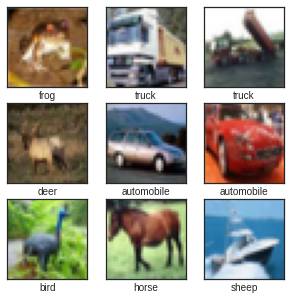

In [ ]:
np.random.seed(777)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'sheep', 'truck']

sample_size=9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize=(5, 5))
for i, idx in enumerate(random_idx):
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train_full[i])
  plt.xlabel(class_names[int(y_train_full[i])])

plt.show()

In [ ]:
x_mean = np.mean(x_train_full, axis=(0, 1, 2))
x_std = np.std(x_train_full, axis=(0, 1, 2))

x_train_full = (x_train_full - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3)

In [ ]:
print(x_train.shape)
print(y_train.shape)

print(x_val.shape)
print(y_val.shape)

print(x_test.shape)
print(y_test.shape)

(35000, 32, 32, 3)
(35000, 1)
(15000, 32, 32, 3)
(15000, 1)
(10000, 32, 32, 3)
(10000, 1)


### 모델 구성 및 컴파일


In [ ]:
def model_build():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(input)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
model = model_build()
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 7s 51ms/step - loss: 2.0346 - accuracy: 0.3262 - val_loss: 2.0388 - val_accuracy: 0.4403
Epoch 2/30
137/137 [==============================] - 7s 48ms/step - loss: 1.6540 - accuracy: 0.4206 - val_loss: 1.6764 - val_accuracy: 0.4908
Epoch 3/30
137/137 [==============================] - 7s 48ms/step - loss: 1.5090 - accuracy: 0.4681 - val_loss: 1.4340 - val_accuracy: 0.5293
Epoch 4/30
137/137 [==============================] - 7s 48ms/step - loss: 1.4261 - accuracy: 0.4967 - val_loss: 1.2781 - val_accuracy: 0.5614
Epoch 5/30
137/137 [==============================] - 7s 48ms/step - loss: 1.3335 - accuracy: 0.5301 - val_loss: 1.2147 - val_accuracy: 0.5811
Epoch 6/30
137/137 [==============================] - 7s 48ms/step - loss: 1.2742 - accuracy: 0.5505 - val_loss: 1.1712 - val_accuracy: 0.5903
Epoch 7/30
137/137 [==============================] - 7s 48ms/step - loss: 1.2119 - accuracy: 0.5723 - val_loss: 1.1310 - val_accuracy: 0.6061

### 학습 과정 시각화

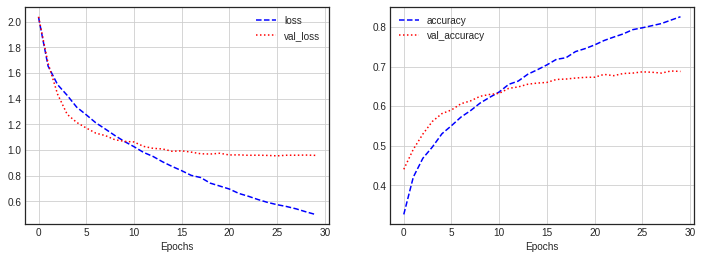

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()


- 해당 모델은 성능이 좋지 않음
- 규제화, 드롭아웃 등 과대적합을 방지하는 기술 필요

In [ ]:
def model_build2():
  model = Sequential()

  input = Input(shape=(32, 32, 3))

  output = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)

  output = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(input)
  output = BatchNormalization()(output)
  output = MaxPool2D(pool_size=(2, 2), strides=2, padding='same')(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(128, activation='relu')(output)
  output = Dense(10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer=Adam(learning_rate=1e-4),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

In [ ]:
model = model_build2()
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 128)       3584      
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 16, 16, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)              

### 모델 학습 및 평가
- [런타임]에서 GPU 설정


In [ ]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/30
137/137 [==============================] - 7s 50ms/step - loss: 2.0320 - accuracy: 0.3261 - val_loss: 2.0422 - val_accuracy: 0.4417
Epoch 2/30
137/137 [==============================] - 7s 48ms/step - loss: 1.6476 - accuracy: 0.4229 - val_loss: 1.7133 - val_accuracy: 0.4997
Epoch 3/30
137/137 [==============================] - 7s 48ms/step - loss: 1.5176 - accuracy: 0.4650 - val_loss: 1.4480 - val_accuracy: 0.5273
Epoch 4/30
137/137 [==============================] - 7s 48ms/step - loss: 1.4213 - accuracy: 0.4948 - val_loss: 1.3028 - val_accuracy: 0.5587
Epoch 5/30
137/137 [==============================] - 7s 48ms/step - loss: 1.3575 - accuracy: 0.5204 - val_loss: 1.2170 - val_accuracy: 0.5753
Epoch 6/30
137/137 [==============================] - 7s 48ms/step - loss: 1.2841 - accuracy: 0.5464 - val_loss: 1.1727 - val_accuracy: 0.5909
Epoch 7/30
137/137 [==============================] - 7s 48ms/step - loss: 1.2316 - accuracy: 0.5667 - val_loss: 1.1351 - val_accuracy: 0.6008

### 학습 과정 시각화

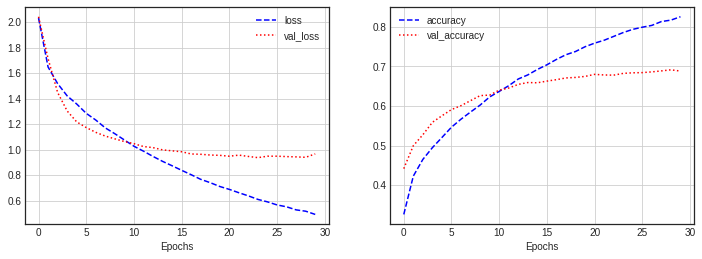

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'b--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r:', label='val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()